In [183]:
import pandas as pd
from joblib import load, dump
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Import Support Vector Regressor
from sklearn.svm import SVR
from sklearn.svm import SVC


# Import Ridge Regression
from sklearn.linear_model import Ridge
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Activity Level Model

### Model predicts total time in bed which was shown to highly correlate with sleep quality scores from other dataframes. The goal is to offer tailored suggestions to help maximize sleep time based on a few features that influence time in bed the most

In [2]:
activity_level_model = load("Models&Metrics/Activity_level_model/Activity_level_model.joblib")
activity_level_df = load("Models&Metrics/Activity_level_model/DataFrame.joblib")
activity_level_model_performance = load("Models&Metrics/Activity_level_model/model_performance_metrics.joblib")
activity_level_best_params = load("Models&Metrics/Activity_level_model/best_params.joblib")

X_train_activity = load("Models&Metrics/Activity_level_model/X_train_data.joblib")
X_test_activity = load("Models&Metrics/Activity_level_model/X_test_data.joblib")
y_train_activity = load("Models&Metrics/Activity_level_model/y_train_data.joblib")
y_test_activity = load("Models&Metrics/Activity_level_model/y_test_data.joblib")


In [3]:
activity_level_model_performance

{'r2': 0.5310757695984683, 'mse': 5621.473239782222}

In [4]:
activity_level_df.columns

Index(['Id', 'TotalSteps', 'TotalDistance', 'LoggedActivitiesDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Date',
       'WeekStartDate', 'TotalSteps_Weekly', 'TotalDistance_Weekly',
       'LoggedActivitiesDistance_Weekly', 'ModeratelyActiveDistance_Weekly',
       'LightActiveDistance_Weekly', 'SedentaryActiveDistance_Weekly',
       'VeryActiveMinutes_Weekly', 'FairlyActiveMinutes_Weekly',
       'LightlyActiveMinutes_Weekly', 'SedentaryMinutes_Weekly',
       'Calories_Weekly', 'TotalSleepRecords_Weekly',
       'TotalMinutesAsleep_Weekly', 'TotalTimeInBed_Weekly', 'Date_Weekly'],
      dtype='object')

In [5]:
poor_sleep = activity_level_df[activity_level_df['TotalMinutesAsleep'] < 420]

In [6]:
poor_sleep = poor_sleep[['SedentaryMinutes', 'TotalTimeInBed_Weekly', 'LightActiveDistance', 'LightlyActiveMinutes', 'TotalSteps', 'TotalDistance', 'TotalMinutesAsleep_Weekly', 'Calories','TotalMinutesAsleep']]

In [7]:
poor_sleep.head()

,SedentaryMinutes,TotalTimeInBed_Weekly,LightActiveDistance,LightlyActiveMinutes,TotalSteps,TotalDistance,TotalMinutesAsleep_Weekly,Calories,TotalMinutesAsleep
5,775,454.8,5.03,264,15506,9.88,432.6,2035,304
6,818,454.8,4.24,205,10544,6.68,432.6,1786,360
7,838,454.8,4.65,211,9819,6.34,432.6,1775,325
8,732,454.8,5.36,262,14371,9.04,432.6,1949,361
10,814,378.8,3.94,216,15355,9.80,356.0,2013,277


In [8]:
activity_level_best_params

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [9]:
activity_level_model

GradientBoostingRegressor(max_features='sqrt')

### Activity Model Training

In [10]:
#New X and y data for the activity model
X_activity = np.array(activity_level_df.drop(['Id','TotalTimeInBed','TotalMinutesAsleep','Date','Date_Weekly','TotalSleepRecords_Weekly','WeekStartDate','LoggedActivitiesDistance','SedentaryActiveDistance_Weekly'],axis=1))
y_activity = activity_level_df['TotalMinutesAsleep'].values

### Checking Old Model for Overfitting 

In [20]:
y_pred_activity = activity_level_model.predict(X_test_activity)

mse = mean_squared_error(y_test_activity, y_pred_activity)
print(f"Test Data Mean Squared Error: {mse}")


r2 = r2_score(y_test_activity, y_pred_activity)
print(f"Test Data R-squared: {r2}")

rmse = np.sqrt(mean_squared_error(y_test_activity, y_pred_activity))
print(f"Test Data RMSE: {rmse}")


print('')

#Predicting on Train data to check for overfitting. 
y_pred_activity_train = activity_level_model.predict(X_train_activity)

mse = mean_squared_error(y_train_activity, y_pred_activity_train)
print(f"Train Data Mean Squared Error: {mse}")


r2 = r2_score(y_train_activity, y_pred_activity_train)
print(f"Train Data R-squared: {r2}")

rmse = np.sqrt(mean_squared_error(y_train_activity, y_pred_activity_train))
print(f"Train Data RMSE: {rmse}")

Test Data Mean Squared Error: 5621.473239782222
Test Data R-squared: 0.5310757695984683
Test Data RMSE: 74.97648457871456

Train Data Mean Squared Error: 595.0929144233256
Train Data R-squared: 0.9411042890788174
Train Data RMSE: 24.394526320945968


In [21]:
#The model is overfitting. I will make some changes to account for this

In [22]:
#For cross validating my data to see how model predicts on new data
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [26]:
#The regressor seems to perform better

model =  GradientBoostingRegressor()


scores = cross_val_score(model, X_activity, y_activity, cv=kf, scoring='r2')

print("Cross-validation scores:", scores)
print("Average score:",np.mean(scores))

Cross-validation scores: [0.6044385  0.48578804 0.6296541  0.70226014 0.18991523 0.68556999
 0.49381983 0.60668744 0.52311998 0.65200823]
Average score: 0.5573261471833686


In [32]:
activity_features = activity_level_df.drop(['Id','TotalTimeInBed','TotalMinutesAsleep','Date','Date_Weekly','TotalSleepRecords_Weekly','WeekStartDate','LoggedActivitiesDistance','SedentaryActiveDistance_Weekly'],axis=1).columns

In [33]:
activity_features

Index(['TotalSteps', 'TotalDistance', 'ModeratelyActiveDistance',
       'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes',
       'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes',
       'Calories', 'TotalSleepRecords', 'TotalSteps_Weekly',
       'TotalDistance_Weekly', 'LoggedActivitiesDistance_Weekly',
       'ModeratelyActiveDistance_Weekly', 'LightActiveDistance_Weekly',
       'VeryActiveMinutes_Weekly', 'FairlyActiveMinutes_Weekly',
       'LightlyActiveMinutes_Weekly', 'SedentaryMinutes_Weekly',
       'Calories_Weekly', 'TotalMinutesAsleep_Weekly',
       'TotalTimeInBed_Weekly'],
      dtype='object')

### Extracting Feature Importance 

In [34]:
# I will use the base gbregressor model to give me an idea of feature importance since the model performs relatively well
gbregressor = GradientBoostingRegressor()

#This is the train test data from my old model. It is already scaled
gbregressor.fit(X_train_activity,y_train_activity)

y_pred_activity = gbregressor.predict(X_test_activity)

In [35]:
mse = mean_squared_error(y_test_activity, y_pred_activity)
print(f"Test Data Mean Squared Error: {mse}")


r2 = r2_score(y_test_activity, y_pred_activity)
print(f"Test Data R-squared: {r2}")

rmse = np.sqrt(mean_squared_error(y_test_activity, y_pred_activity))
print(f"Test Data RMSE: {rmse}")


print('')

#Predicting on Train data to check for overfitting. 
y_pred_activity_train = activity_level_model.predict(X_train_activity)

mse = mean_squared_error(y_train_activity, y_pred_activity_train)
print(f"Train Data Mean Squared Error: {mse}")


r2 = r2_score(y_train_activity, y_pred_activity_train)
print(f"Train Data R-squared: {r2}")

rmse = np.sqrt(mean_squared_error(y_train_activity, y_pred_activity_train))
print(f"Train Data RMSE: {rmse}")

Test Data Mean Squared Error: 4573.258818926183
Test Data R-squared: 0.618514261187685
Test Data RMSE: 67.62587388659892

Train Data Mean Squared Error: 595.0929144233256
Train Data R-squared: 0.9411042890788174
Train Data RMSE: 24.394526320945968


In [36]:
#The baseline gradient boosting regressor model is also overfitting on the data as shown by the results
#First I will try reducing the amount of features to see if this helps.

In [37]:
#Extracting feature importance for each feature
feature_importances = gbregressor.feature_importances_
feature_importances_activity =list(zip(activity_features,feature_importances))
print(feature_importances_activity)

[('TotalSteps', 0.03974584880419604), ('TotalDistance', 0.04489468853669897), ('ModeratelyActiveDistance', 0.005398056507289977), ('LightActiveDistance', 0.07635904558219059), ('SedentaryActiveDistance', 0.0), ('VeryActiveMinutes', 0.011578084684243567), ('FairlyActiveMinutes', 0.00976352084037276), ('LightlyActiveMinutes', 0.06454304715118885), ('SedentaryMinutes', 0.4543804385375964), ('Calories', 0.04394881556033692), ('TotalSleepRecords', 0.003365395251437999), ('TotalSteps_Weekly', 0.0071965242325510975), ('TotalDistance_Weekly', 0.0040083502017772155), ('LoggedActivitiesDistance_Weekly', 0.0002658305946024498), ('ModeratelyActiveDistance_Weekly', 0.02002240630615126), ('LightActiveDistance_Weekly', 0.02270139103316574), ('VeryActiveMinutes_Weekly', 0.0), ('FairlyActiveMinutes_Weekly', 0.0016258203957640763), ('LightlyActiveMinutes_Weekly', 0.0028233468081712942), ('SedentaryMinutes_Weekly', 0.0036844683550049367), ('Calories_Weekly', 0.0036137242171587034), ('TotalMinutesAsleep_W

In [38]:
# Sort the list by the second element of each tuple
sorted_feature_importances = sorted(feature_importances_activity, key=lambda x: x[1],reverse=True)
features_list = []
# Print the sorted list
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")
    features_list.append(feature)
    
#The most important features are in the beginning and the least important towards the end.

SedentaryMinutes: 0.4543804385375964
TotalTimeInBed_Weekly: 0.13841014641963856
LightActiveDistance: 0.07635904558219059
LightlyActiveMinutes: 0.06454304715118885
TotalDistance: 0.04489468853669897
Calories: 0.04394881556033692
TotalSteps: 0.03974584880419604
TotalMinutesAsleep_Weekly: 0.028973059954559247
LightActiveDistance_Weekly: 0.02270139103316574
ModeratelyActiveDistance_Weekly: 0.02002240630615126
VeryActiveMinutes: 0.011578084684243567
FairlyActiveMinutes: 0.00976352084037276
TotalSteps_Weekly: 0.0071965242325510975
ModeratelyActiveDistance: 0.005398056507289977
TotalDistance_Weekly: 0.0040083502017772155
SedentaryMinutes_Weekly: 0.0036844683550049367
Calories_Weekly: 0.0036137242171587034
TotalSleepRecords: 0.003365395251437999
LightlyActiveMinutes_Weekly: 0.0028233468081712942
FairlyActiveMinutes_Weekly: 0.0016258203957640763
LoggedActivitiesDistance_Weekly: 0.0002658305946024498
SedentaryActiveDistance: 0.0
VeryActiveMinutes_Weekly: 0.0


### Feature Reduction

In [40]:
best_score = float('-inf')
best_features = None

for x in range(len(features_list)):
    # Create a new numpy array with the selected features
    X_subset = np.array(activity_level_df[features_list[:len(features_list) - x]])

    model = GradientBoostingRegressor()

    # Perform cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_subset, y_activity, cv=kf, scoring='r2')
    average_score = np.mean(scores)
    # Perform cross-validation


    # Update the best score and corresponding feature set
    if average_score > best_score:
        best_score = average_score
        best_features = features_list[:len(features_list) - x]

# Print the best score and corresponding features
print(f"Best R² score: {best_score}")
print(f"Features for best score: {best_features}")


Best R² score: 0.6172675440152335
Features for best score: ['SedentaryMinutes', 'TotalTimeInBed_Weekly', 'LightActiveDistance', 'LightlyActiveMinutes', 'TotalDistance', 'Calories', 'TotalSteps', 'TotalMinutesAsleep_Weekly']


In [42]:
best_features

['SedentaryMinutes',
 'TotalTimeInBed_Weekly',
 'LightActiveDistance',
 'LightlyActiveMinutes',
 'TotalDistance',
 'Calories',
 'TotalSteps',
 'TotalMinutesAsleep_Weekly']

In [43]:
#Using the best features
X_activity_reduced = np.array(activity_level_df[best_features])
y_activity = activity_level_df['TotalMinutesAsleep'].values

#Will take the first 7 most important features here
X_activity_min_features = np.array(activity_level_df[best_features[:7]])

In [44]:
len(X_activity_reduced)

318

In [45]:
len(y_activity)

318

In [46]:
#Model trained on reduced features
gbregressor = GradientBoostingRegressor()
scores = cross_val_score(gbregressor, X_activity_reduced, y_activity, cv=kf, scoring='r2')
print(f"Average r2 score: {np.mean(scores)}")
print('')
print(f"All scores: {scores}")

Average r2 score: 0.6104821497035781

All scores: [0.62771394 0.60727823 0.6455681  0.67703516 0.23491341 0.66833132
 0.6717301  0.6395691  0.55492868 0.77775347]


In [47]:
#Model trained on less features
gbregressor = GradientBoostingRegressor()
scores = cross_val_score(gbregressor, X_activity_min_features, y_activity, cv=kf, scoring='r2')
print(f"Average r2 score: {np.mean(scores)}")
print('')
print(f"All scores: {scores}")

Average r2 score: 0.5611795862022932

All scores: [0.53125788 0.64035675 0.53428122 0.53248881 0.27784083 0.69693004
 0.6007861  0.59774612 0.46897614 0.73113197]


In [ ]:
#The model with 8 features performs better than the model with 7. I will continue with all 8 features

In [48]:
kf = KFold(n_splits=10, shuffle=True, random_state=123)
scores = cross_val_score(gbregressor, X_activity_reduced, y_activity, cv=kf, scoring='r2')
print(f"Average r2 score: {np.mean(scores)}")
print('')
print(f"All scores: {scores}")

Average r2 score: 0.6046686687984602

All scores: [0.38588559 0.65349095 0.48247528 0.56625685 0.65496515 0.64692165
 0.50712806 0.71740838 0.68141283 0.75074195]


In [ ]:
#Scaling data seems to slightly hurt performance so I will work with the unscaled data from now on

### Hyperparameter Tuning 

In [50]:
# First I will start with Random searches to get a general idea of good hyper parameters.

param_grid_gb = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],  # Expanded range with finer steps
    'learning_rate': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15],  # Finer steps around 0.1
    'max_depth': [2, 3, 4, 5, 6, 7],  # Expanded range with small increments
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],  # Finer steps starting from 2
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Finer steps starting from 1
    'subsample': [0.8, 0.85, 0.9, 0.95, 1.0],  # Finer steps around 1.0
    'max_features': [None, 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(gbregressor, param_distributions=param_grid_gb, 
                                   n_iter=300, cv=10, scoring='r2', 
                                   random_state=42, n_jobs=-1)
random_search.fit(X_activity_reduced, y_activity)

print(f"Best Parameters:", random_search.best_params_)
print(f"Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 1.0, 'n_estimators': 140, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 2, 'learning_rate': 0.13}
Best Score: 0.5761432028670098


In [51]:
#This param grid is more tightly centered around the best params from the last random search

param_grid_gb = {
    'n_estimators': [115, 120, 125, 130, 135],         # Narrower range around 120
    'learning_rate': [0.065, 0.07, 0.075, 0.08, 0.085], # Narrower range around 0.07
    'max_depth': [3, 4, 5],                             # Closer values around 3
    'min_samples_split': [5, 6, 7, 8, 9],               # Slightly broader range around 6
    'min_samples_leaf': [4, 5, 6, 7, 8],                # Slightly broader range around 5
    'max_features': ['sqrt', 'log2', None],                   # Focusing on sqrt and log2
    'subsample': [0.75, 0.8, 0.85, 0.9, 0.95]           # Broader range around 0.8
}



random_search = RandomizedSearchCV(gbregressor, param_distributions=param_grid_gb, 
                                   n_iter=500, cv=10, scoring='r2', 
                                   random_state=42, n_jobs=-1)
random_search.fit(X_activity_reduced, y_activity)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 130, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.065}
Best Score: 0.5857642889906809


In [52]:
#This param grid hones in even further on the new best params

param_grid_gb = {
    'n_estimators': [130, 135, 140, 145, 150],              # Centered around 135
    'learning_rate': [0.08, 0.085, 0.09, 0.095, 0.1],       # Centered around 0.085
    'max_depth': [3, 4, 5, 6, 7],                           # Centered around 4
    'min_samples_split': [5, 6, 7, 8, 9],                   # Centered around 7
    'min_samples_leaf': [4, 5, 6, 7, 8],                    # Centered around 5
    'max_features': ['sqrt', 'log2', None],                 # Including 'sqrt' and other options
    'subsample': [0.9, 0.925, 0.95, 0.975, 1.0]             # Centered around 0.95
}

random_search = RandomizedSearchCV(gbregressor, param_distributions=param_grid_gb, 
                                   n_iter=600, cv=10, scoring='r2', 
                                   random_state=42, n_jobs=-1)
random_search.fit(X_activity_reduced, y_activity)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.975, 'n_estimators': 135, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.1}
Best Score: 0.5753012786515808


In [ ]:
#Now I will use a grid search to explore values around the current best hyperparmeters

In [53]:

param_grid_gb = {
    'n_estimators': [130, 135, 140],                    # Close to 135
    'learning_rate': [0.08, 0.085, 0.09],               # Close to 0.085
    'max_depth': [3, 4, 5],                             # Close to 4
    'min_samples_split': [6, 7, 8],                     # Close to 7
    'min_samples_leaf': [4, 5, 6],                      # Close to 5
    'max_features': ['sqrt'],                           # Since 'sqrt' is specified
    'subsample': [0.925, 0.95, 0.975]                   # Close to 0.95
}

grid_search = GridSearchCV(
estimator=GradientBoostingRegressor(),
param_grid=param_grid_gb,
cv=10,  # Number of cross-validation folds (can be adjusted)
scoring='r2',  # Scoring metric
verbose=2,  # Controls verbosity: higher number for more detailed messages
n_jobs=-1  # Number of jobs to run in parallel (-1 uses all processors)
)

grid_search.fit(X_activity_reduced, y_activity)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Fitting 10 folds for each of 729 candidates, totalling 7290 fits
Best Parameters: {'learning_rate': 0.085, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 135, 'subsample': 0.925}
Best Score: 0.5842148944925646


### Model Training & Evaluation

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_activity_reduced, y_activity, test_size=0.3, random_state=42)

In [71]:
best_params = grid_search.best_params_

In [72]:
model = GradientBoostingRegressor(**best_params)
model.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.085, max_features='sqrt',
                          min_samples_leaf=5, min_samples_split=6,
                          n_estimators=135, subsample=0.925)

In [73]:
# Predict on train set
y_train_pred = model.predict(X_train)
train_score = r2_score(y_train, y_train_pred)
print("Training Set R² score:", train_score)

# Predict on test set
y_test_pred = model.predict(X_test)
test_score = r2_score(y_test, y_test_pred)
print("Test Set R² score:", test_score)



Training Set R² score: 0.9220936436013296
Test Set R² score: 0.6044584783931162


In [74]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
print("Cross-Validation R² scores on Training Set:", cv_scores)
print("Average Cross-Validation R² score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation R² scores:", cv_scores.std())

Cross-Validation R² scores on Training Set: [0.54134331 0.64811508 0.62809267 0.40641652 0.62450375]
Average Cross-Validation R² score: 0.569694263938138
Standard Deviation of Cross-Validation R² scores: 0.08947365597590856


### Dump best model 

In [111]:
dump(model,"C:/Users/mainf/OneDrive/Desktop/Fitness Data Project/Sleep/Models&Metrics/Activity_level_model/BEST_MODEL.joblib")

['C:/Users/mainf/OneDrive/Desktop/Fitness Data Project/Sleep/Models&Metrics/Activity_level_model/BEST_MODEL.joblib']

In [129]:
poor_sleep

,SedentaryMinutes,TotalTimeInBed_Weekly,LightActiveDistance,LightlyActiveMinutes,TotalSteps,TotalDistance,TotalMinutesAsleep_Weekly,Calories,TotalMinutesAsleep
5,775,454.80,5.03,264,15506,9.88,432.600000,2035,304
6,818,454.80,4.24,205,10544,6.68,432.600000,1786,360
7,838,454.80,4.65,211,9819,6.34,432.600000,1775,325
8,732,454.80,5.36,262,14371,9.04,432.600000,1949,361
10,814,378.80,3.94,216,15355,9.80,356.000000,2013,277
...,...,...,...,...,...,...,...,...,...
370,795,481.25,2.75,232,5245,3.36,459.500000,2748,339
372,714,438.00,3.94,310,6157,3.94,419.333333,2780,402
373,634,438.00,4.93,380,8360,5.35,419.333333,3101,398
374,749,438.00,3.91,301,7174,4.59,419.333333,2896,343


In [120]:
practice_data = np.array(poor_sleep.drop(columns=['TotalMinutesAsleep']))

In [128]:
practice_data

array([[ 775.          ,  454.8         ,    5.0300002098, ...,
           9.8800001144,  432.6         , 2035.          ],
       [ 818.          ,  454.8         ,    4.2399997711, ...,
           6.6799998283,  432.6         , 1786.          ],
       [ 838.          ,  454.8         ,    4.6500000954, ...,
           6.3400001526,  432.6         , 1775.          ],
       ...,
       [ 634.          ,  438.          ,    4.9299998283, ...,
           5.3499999046,  419.3333333333, 3101.          ],
       [ 749.          ,  438.          ,    3.9100000858, ...,
           4.5900001526,  419.3333333333, 2896.          ],
       [ 916.          ,  427.4         ,    1.1699999571, ...,
           1.1699999571,  413.8         , 2015.          ]])

In [126]:
poor_sleep['TotalMinutesAsleep'].reset_index(drop=True)

0      304
1      360
2      325
3      361
4      277
      ... 
128    339
129    402
130    398
131    343
132    415
Name: TotalMinutesAsleep, Length: 133, dtype: int64

# Classification Model 

In [88]:
# Function assigns each entry of sleep time a score from 0 to 3
def categorize_sleep(duration):
    if duration < 240:
        return 0  # Very Poor/Poor
    elif 240 <= duration < 360:
        return 1  # Fair
    elif 360 <= duration < 480:
        return 2  # Good
    else:
        return 3  # Very Good/Excellent

# Apply to your dataset
activity_level_df['sleep_category'] = activity_level_df['TotalMinutesAsleep'].apply(categorize_sleep)




In [89]:
activity_level_df.head()

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,...,VeryActiveMinutes_Weekly,FairlyActiveMinutes_Weekly,LightlyActiveMinutes_Weekly,SedentaryMinutes_Weekly,Calories_Weekly,TotalSleepRecords_Weekly,TotalMinutesAsleep_Weekly,TotalTimeInBed_Weekly,Date_Weekly,sleep_category
4,1,9705,6.48,0.0,0.78,2.51,0.0,38,20,164,...,29.8,19.2,227.8,708.4,1823.6,1.4,432.6,454.8,2016-04-17,3
5,1,15506,9.88,0.0,1.32,5.03,0.0,50,31,264,...,29.8,19.2,227.8,708.4,1823.6,1.4,432.6,454.8,2016-04-17,1
6,1,10544,6.68,0.0,0.48,4.24,0.0,28,12,205,...,29.8,19.2,227.8,708.4,1823.6,1.4,432.6,454.8,2016-04-17,2
7,1,9819,6.34,0.0,0.35,4.65,0.0,19,8,211,...,29.8,19.2,227.8,708.4,1823.6,1.4,432.6,454.8,2016-04-17,1
8,1,14371,9.04,0.0,0.87,5.36,0.0,41,21,262,...,29.8,19.2,227.8,708.4,1823.6,1.4,432.6,454.8,2016-04-17,2


<Axes: >

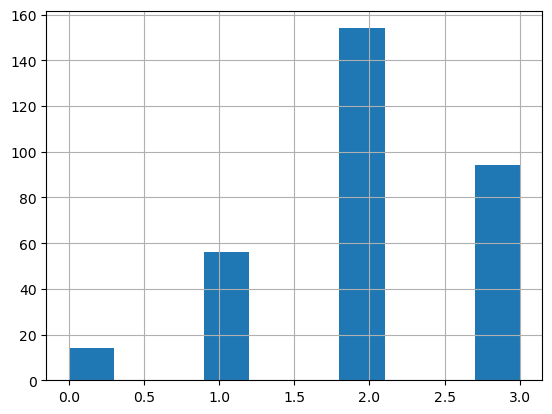

In [90]:
activity_level_df['sleep_category'].hist()

In [123]:
#Creating X and y data and removing irrelvant features
X_activity = np.array(activity_level_df.drop(columns=['Date_Weekly', 'TotalSleepRecords_Weekly', 'LoggedActivitiesDistance_Weekly', 'WeekStartDate', 'Date', 'TotalSleepRecords', 'SedentaryActiveDistance', 'Id', 'TotalTimeInBed_Weekly', 'TotalMinutesAsleep_Weekly', 'TotalMinutesAsleep','sleep_category','TotalTimeInBed']))
y_activity = activity_level_df['sleep_category'].values


### Choosing the Best Model 

In [124]:
rfclassifier = RandomForestClassifier()

In [125]:
gbclassifier = GradientBoostingClassifier()

In [126]:
#Cross Validation for random forest model using accurracy
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rfclassifier, X_activity, y_activity, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average score:",np.mean(scores))

Cross-validation scores: [0.71875    0.4375     0.625      0.6875     0.6875     0.75
 0.65625    0.5625     0.61290323 0.5483871 ]
Average score: 0.6286290322580645


In [127]:
#Cross Validation for random forest model using f1 macro
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rfclassifier, X_activity, y_activity, cv=kf, scoring='f1_macro')

print("Cross-validation scores:", scores)
print("Average score:",np.mean(scores))

Cross-validation scores: [0.75317693 0.38026316 0.41396825 0.52535497 0.5084527  0.53636364
 0.36835749 0.5111336  0.5311943  0.37591575]
Average score: 0.49041807899491047


In [128]:
#Cross Validation for Gradient Boosting model using accurracy
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(gbclassifier, X_activity, y_activity, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average score:",np.mean(scores))

Cross-validation scores: [0.6875     0.5625     0.65625    0.65625    0.65625    0.78125
 0.71875    0.53125    0.67741935 0.58064516]
Average score: 0.6508064516129033


In [129]:
#Cross Validation for Gradient Boosting model using f1 macro
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(gbclassifier, X_activity, y_activity, cv=kf, scoring='f1_macro')

print("Cross-validation scores:", scores)
print("Average score:",np.mean(scores))

Cross-validation scores: [0.76465517 0.55451389 0.65909091 0.50372807 0.5462963  0.70365818
 0.54824561 0.6060054  0.59206349 0.53676471]
Average score: 0.6015021730878262


### Feature Reduction 

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_activity, y_activity, test_size=0.3)

In [136]:
X_features_df = activity_level_df.drop(columns=['Date_Weekly', 'TotalSleepRecords_Weekly', 'LoggedActivitiesDistance_Weekly', 'WeekStartDate', 'Date', 'TotalSleepRecords', 'SedentaryActiveDistance', 'Id', 'TotalTimeInBed_Weekly', 'TotalMinutesAsleep_Weekly', 'TotalMinutesAsleep','sleep_category','TotalTimeInBed'])
X_features = X_features_df.columns

In [137]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Extract feature importances
feature_importances = gb_classifier.feature_importances_

# Assuming you have a list of feature names corresponding to the columns in X
feature_names = X_features

# Combine feature names and their importance scores
features_and_importance = zip(feature_names, feature_importances)
features_and_importance = sorted(features_and_importance, key=lambda x: x[1], reverse=True)

# Display the feature importances
for feature, importance in features_and_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: SedentaryMinutes, Importance: 0.3279846730997384
Feature: Calories, Importance: 0.07942739226981325
Feature: LightlyActiveMinutes, Importance: 0.06454992848253728
Feature: LightActiveDistance, Importance: 0.06453393256469127
Feature: VeryActiveMinutes_Weekly, Importance: 0.053503076353493044
Feature: TotalDistance, Importance: 0.04964790517286269
Feature: FairlyActiveMinutes_Weekly, Importance: 0.04641433866992947
Feature: TotalSteps, Importance: 0.039562087944876534
Feature: SedentaryMinutes_Weekly, Importance: 0.03362108707018443
Feature: FairlyActiveMinutes, Importance: 0.03283182614064885
Feature: Calories_Weekly, Importance: 0.03279635882756592
Feature: ModeratelyActiveDistance, Importance: 0.03178842275195445
Feature: ModeratelyActiveDistance_Weekly, Importance: 0.02982041827335817
Feature: LightActiveDistance_Weekly, Importance: 0.02526969615986168
Feature: TotalDistance_Weekly, Importance: 0.02493053840321976
Feature: LightlyActiveMinutes_Weekly, Importance: 0.02145730

In [143]:
features_ordered = []
for name, value in features_and_importance:
    features_ordered.append(name)
    

In [144]:
features_ordered

['SedentaryMinutes',
 'Calories',
 'LightlyActiveMinutes',
 'LightActiveDistance',
 'VeryActiveMinutes_Weekly',
 'TotalDistance',
 'FairlyActiveMinutes_Weekly',
 'TotalSteps',
 'SedentaryMinutes_Weekly',
 'FairlyActiveMinutes',
 'Calories_Weekly',
 'ModeratelyActiveDistance',
 'ModeratelyActiveDistance_Weekly',
 'LightActiveDistance_Weekly',
 'TotalDistance_Weekly',
 'LightlyActiveMinutes_Weekly',
 'VeryActiveMinutes',
 'TotalSteps_Weekly',
 'LoggedActivitiesDistance',
 'SedentaryActiveDistance_Weekly']

In [149]:
cv_scores = {}

for i in range(1, len(features_ordered) + 1):
    # Select the first i features
    subset_features = features_ordered[:i]
    X_subset = X_features_df[subset_features]

    # Perform cross-validation
    scores = cross_val_score(gb_classifier, X_subset, y_activity, cv=10, scoring='f1_macro')  
    cv_scores[f'First {i} features'] = scores.mean()

# Display the scores
for subset, score in cv_scores.items():
    print(f"{subset}: {score:.4f}")


First 1 features: 0.4287
First 2 features: 0.4759
First 3 features: 0.4862
First 4 features: 0.4992
First 5 features: 0.4918
First 6 features: 0.5797
First 7 features: 0.5561
First 8 features: 0.5687
First 9 features: 0.5768
First 10 features: 0.5442
First 11 features: 0.5683
First 12 features: 0.5360
First 13 features: 0.5443
First 14 features: 0.5421
First 15 features: 0.5041
First 16 features: 0.4848
First 17 features: 0.5125
First 18 features: 0.5238
First 19 features: 0.5301
First 20 features: 0.4914


In [150]:
cv_scores = {}

for i in range(1, len(features_ordered) + 1):
    # Select the first i features
    subset_features = features_ordered[:i]
    X_subset = X_features_df[subset_features]

    # Perform cross-validation
    scores = cross_val_score(gb_classifier, X_subset, y_activity, cv=10, scoring='accuracy')  
    cv_scores[f'First {i} features'] = scores.mean()

# Display the scores
for subset, score in cv_scores.items():
    print(f"{subset}: {score:.4f}")

First 1 features: 0.4973
First 2 features: 0.5193
First 3 features: 0.5602
First 4 features: 0.5569
First 5 features: 0.5660
First 6 features: 0.6257
First 7 features: 0.6007
First 8 features: 0.6009
First 9 features: 0.5977
First 10 features: 0.5821
First 11 features: 0.5726
First 12 features: 0.5728
First 13 features: 0.5697
First 14 features: 0.5696
First 15 features: 0.5378
First 16 features: 0.5414
First 17 features: 0.5726
First 18 features: 0.5664
First 19 features: 0.5539
First 20 features: 0.5413


In [151]:
best_features = features_ordered[:6]

In [152]:
best_features

['SedentaryMinutes',
 'Calories',
 'LightlyActiveMinutes',
 'LightActiveDistance',
 'VeryActiveMinutes_Weekly',
 'TotalDistance']

In [155]:
X_activity = np.array(X_features_df[best_features])
y_activity = activity_level_df['sleep_category'].values

In [160]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(gbclassifier, X_activity, y_activity, cv=kf, scoring='f1_macro')

print("Cross-validation scores:", scores)
print("Average score:",np.mean(scores))

Cross-validation scores: [0.48418264 0.54301471 0.46151026 0.50574713 0.73232323 0.75219298
 0.67302632 0.58297268 0.53672904 0.52109073]
Average score: 0.579278972069887


In [161]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(gbclassifier, X_activity, y_activity, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average score:",np.mean(scores))

Cross-validation scores: [0.6875     0.59375    0.59375    0.65625    0.8125     0.78125
 0.8125     0.59375    0.58064516 0.58064516]
Average score: 0.6692540322580646


### Hyperparameter Tuning 

In [173]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    estimator=gbclassifier, 
    param_distributions=param_grid, 
    n_iter=200,        
    cv=10,                
    verbose=2,          
    random_state=42,     
    n_jobs=-1,
    scoring = 'f1_macro'
    
)


random_search.fit(X_activity, y_activity)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print('Best params:',best_params)
print('Best score:', best_score)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best params: {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.05}
Best score: 0.5974228242162856


In [163]:
param_grid = {
    'n_estimators': [30, 40, 50, 60, 70],  # Centered around 50
    'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3],  # Centered around 0.2
    'max_depth': [2, 3, 4, 5],  # Centered around 3
    'min_samples_split': [2, 4, 6, 8],  # Centered around 2
    'min_samples_leaf': [1, 2, 3, 4],  # Centered around 2
    'max_features': ['sqrt', 'log2', None]  # Including 'sqrt' and other common options
}

random_search = RandomizedSearchCV(
    estimator=gbclassifier, 
    param_distributions=param_grid, 
    n_iter=200,        
    cv=10,                
    verbose=2,          
    random_state=42,     
    n_jobs=-1,
    scoring = 'f1_macro'
    
)


random_search.fit(X_activity, y_activity)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print('Best params:',best_params)
print('Best score:', best_score)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best params: {'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.3}
Best score: 0.5229793156814819


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_activity, y_activity, test_size=0.3)


In [165]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [166]:
(y_train_resampled == 0).sum()

108

In [167]:
gbclassifier.fit(X_train_resampled,y_train_resampled)


GradientBoostingClassifier()

In [168]:
y_preds = gbclassifier.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.53      0.53      0.53        17
           2       0.66      0.59      0.62        46
           3       0.69      0.80      0.74        30

    accuracy                           0.66        96
   macro avg       0.72      0.73      0.72        96
weighted avg       0.65      0.66      0.65        96



In [169]:
gbclassifier.fit(X_train,y_train)

y_preds = gbclassifier.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.54      0.41      0.47        17
           2       0.63      0.70      0.66        46
           3       0.70      0.70      0.70        30

    accuracy                           0.65        96
   macro avg       0.72      0.62      0.66        96
weighted avg       0.65      0.65      0.64        96



In [171]:
rfclassifier.fit(X_train_resampled,y_train_resampled)
y_preds = rfclassifier.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.60      0.53      0.56        17
           2       0.69      0.67      0.68        46
           3       0.68      0.77      0.72        30

    accuracy                           0.68        96
   macro avg       0.74      0.66      0.69        96
weighted avg       0.68      0.68      0.68        96



In [ ]:
rfclassifier

In [174]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rfclassifier, X_train_resampled,y_train_resampled, cv=kf, scoring='f1_macro')

print("Cross-validation scores:", scores)
print("Average score:",np.mean(scores))

Cross-validation scores: [0.83928571 0.82800512 0.8173454  0.8        0.83142348 0.8139881
 0.7272076  0.79588998 0.81808971 0.73214286]
Average score: 0.8003377953782955


In [175]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rfclassifier, X_train_resampled,y_train_resampled, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average score:",np.mean(scores))

Cross-validation scores: [0.88636364 0.81818182 0.81395349 0.88372093 0.81395349 0.88372093
 0.74418605 0.8372093  0.81395349 0.74418605]
Average score: 0.8239429175475687


In [176]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}




random_search = RandomizedSearchCV(
    estimator=rfclassifier, 
    param_distributions=param_grid, 
    n_iter=200,        
    cv=10,                
    verbose=2,          
    random_state=42,     
    n_jobs=-1,
    scoring = 'f1_macro'
    
)


random_search.fit(X_train_resampled,y_train_resampled)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print('Best params:',best_params)
print('Best score:', best_score)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'bootstrap': True}
Best score: 0.8414037440439042


In [177]:
param_grid_tight = {
    'n_estimators': [175, 185, 195, 200, 205, 215, 225],
    'max_depth': [18, 19, 20, 21, 22],
    'min_samples_split': [3, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt'],
    'bootstrap': [True]
}


random_search = RandomizedSearchCV(
    estimator=rfclassifier, 
    param_distributions=param_grid_tight, 
    n_iter=200,        
    cv=10,                
    verbose=2,          
    random_state=42,     
    n_jobs=-1,
    scoring = 'f1_macro'
    
)


random_search.fit(X_train_resampled,y_train_resampled)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print('Best params:',best_params)
print('Best score:', best_score)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best params: {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 19, 'bootstrap': True}
Best score: 0.8432393931392788


In [178]:
rfclassifier = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid_centered = {
    'n_estimators': [190, 195, 200, 205],
    'max_depth': [18, 19, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1],
    'max_features': [None, 'sqrt'],
    'bootstrap': [True]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rfclassifier, param_grid=param_grid_centered, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('Best parameters:', best_params)
print('Best score:', best_score)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters: {'bootstrap': True, 'max_depth': 18, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 205}
Best score: 0.8403805496828752


In [179]:
best_model.fit(X_train_resampled,y_train_resampled)
y_preds = best_model.predict(X_test)

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.55      0.65      0.59        17
           2       0.69      0.59      0.64        46
           3       0.66      0.77      0.71        30

    accuracy                           0.66        96
   macro avg       0.72      0.67      0.68        96
weighted avg       0.67      0.66      0.66        96

